### Classification in Business

<center>
    <img src = 'images/uci_biz.png' />
</center>



------------


For this try-it, you are to explore some available datasets related to business applications of classification.  Using a dataset from the UCI Machine Learning Repository, scan datasets   under the subject area "BUSINESS" [link here](https://archive.ics.uci.edu/datasets?skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Business).  Find a dataset that looks interesting to you and decide how you could use Logistic Regression to help make a business decision using the data. 

In sharing your results, be sure to clearly describe the following:

- the dataset and its features
- the classification problem -- what are you classifying here?
- a business decision that can be supported using the results of the classification model

Share your summary on the appropriate discussion board for the activity. 

### Bank Marketing Classification Analysis

# Dataset Description
The Bank Marketing dataset contains information about direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if a client will subscribe to a term deposit.

# Key Features
- Age: Customer's age
- Job: Type of job (admin, blue-collar, entrepreneur, etc.)
- Marital: Marital status
- Education: Education level
- Default: Has credit in default?
- Balance: Average yearly balance
- Housing: Has housing loan?
- Loan: Has personal loan?
- Contact: Contact communication type
- Campaign: Number of contacts performed
- Previous: Number of contacts before this campaign

# Classification Problem
Target Variable: Whether the client subscribes to a term deposit (yes/no)

# Business Decision Support
This classification model can help the bank:
1. Optimize marketing resources by targeting likely subscribers
2. Increase campaign ROI by focusing on high-probability prospects
3. Develop personalized marketing strategies based on feature importance

Dataset Shape: (7043, 21)

First few rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport Strea

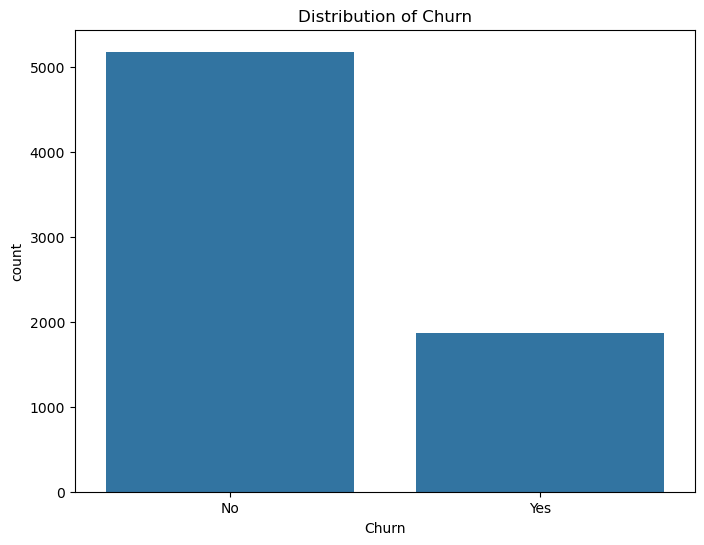

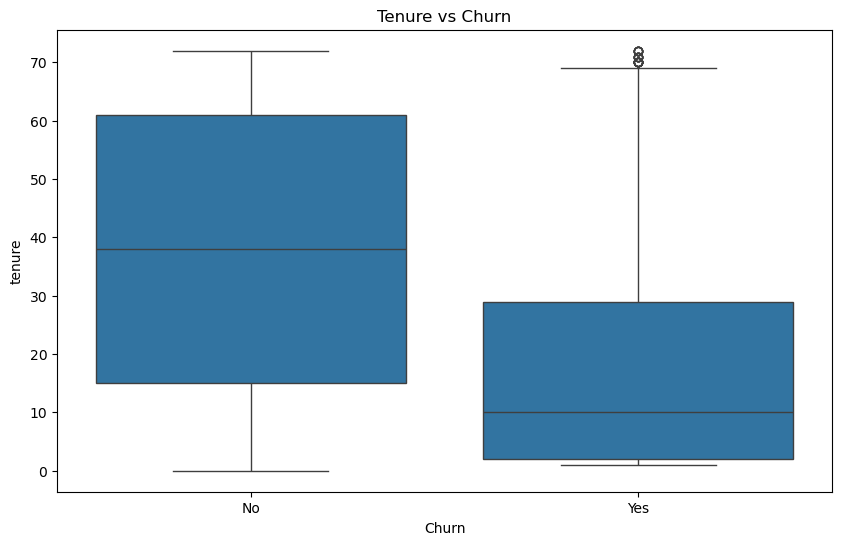


Model Performance:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409


Feature Importance:
          Feature  Importance
0          tenure    1.450811
1  MonthlyCharges    0.917957
2    TotalCharges    0.159395


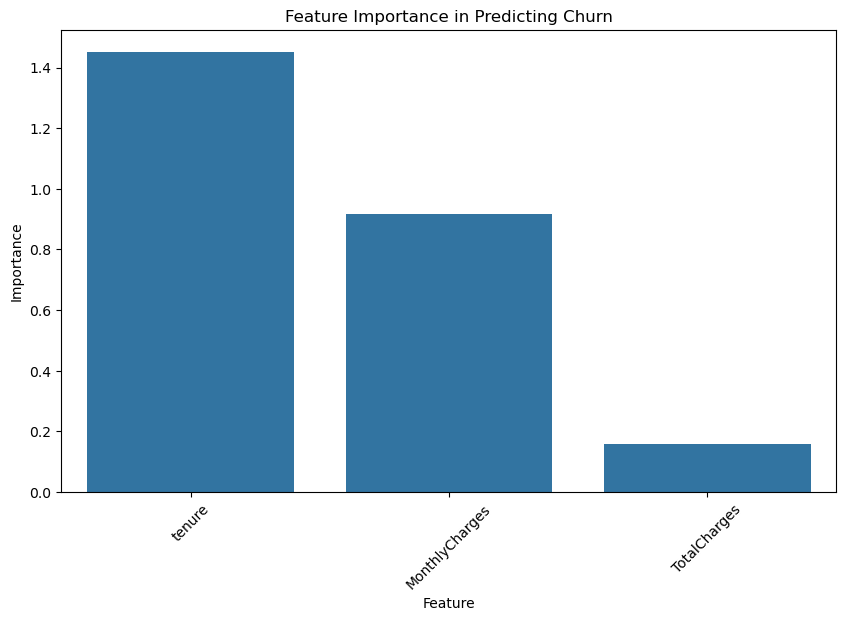

In [1]:
### Telecom Customer Churn Classification Analysis

# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data/wa_churn.csv')

# Basic data exploration
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Convert TotalCharges to numeric, handling any spaces
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Basic statistics
print("\nNumerical Features Statistics:")
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

# Churn rate analysis
print("\nChurn Rate:")
print(df['Churn'].value_counts(normalize=True))

# Visualize churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn')
plt.title('Distribution of Churn')
plt.show()

# Analyze relationship between tenure and churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure vs Churn')
plt.show()

# Prepare data for modeling
# Select features for the model
features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X = df[features].copy()
y = (df['Churn'] == 'Yes').astype(int)

# Handle missing values
X = X.fillna(X.mean())

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print model performance
print("\nModel Performance:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': abs(model.coef_[0])
})
print("\nFeature Importance:")
print(feature_importance.sort_values('Importance', ascending=False))

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Feature', y='Importance')
plt.title('Feature Importance in Predicting Churn')
plt.xticks(rotation=45)
plt.show()